# Linear Regression

## Agenda:

- Introduction of Regression Problems

- Introducing `Advertising` Dataset

- Train-Test Dataset split



- Discussion of Liner Regression in the Simple Setting

    - Model
    - Hypothesis Function
    - Cost Function
    - Solution - Least Squares Approach
    
- MultiLinear Regression

- Residual Plots

## Dataset

- We will be using the `advertising` dataset from ISLR

- This data contains advertising budget in (Thousand $\$$) and product sales (Millions $\$$)

- Let's take a look at the dataset

In [2]:
import pandas as pd # for manipulating data
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import requests # for loading data from an online resource
from io import StringIO # for reading inputs


In [3]:
orig_url = "https://drive.google.com/file/d/1XdOaGHuGWgEMVMEiJ0dbwdPh6mH6PQZi/view?usp=sharing"

file_id = orig_url.split('/')[-2]

dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

url = requests.get(dwn_url).text

csv_raw = StringIO(url)

advertising = pd.read_csv(csv_raw, index_col= 0)

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 4)

__Goal__

Goal for this project is to be able to predict `sales` given the advertising budgets of the company in some other city.

__Note__

- This is a `supervised learning` problem: ( We are given `right answers` )

- More particularly this is a Regression Problem (Predicting a real-valued output)

__Training vs Test Datasets__

- We want `machine` to learn from our training data.
- Also don't forget the ultimate goal: Accurately predicting sales for an unseen data(New city) when we apply the algorithm to this case.
- But `machine`'s success on training data might be misleading! (Do you see why?)


<img src = "images/train-test.png" width =450/>

- Can you think of a solution?

In [30]:
## train test split

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(advertising, shuffle = True,  test_size = 0.2,random_state= 9152020 ) # splits the data into two parts with 1:4 ratio

X_train.head()

,TV,Radio,Newspaper,Sales
76,16.9,43.7,89.4,8.7
13,23.8,35.1,65.9,9.2
16,195.4,47.7,52.9,22.4
165,117.2,14.7,5.4,11.9
178,170.2,7.8,35.2,11.7


In [6]:
print(X_train.shape)
X_train[["TV", "Sales"]].head()

(160, 4)


,TV,Sales
18,281.4,24.4
64,102.7,14.0
185,253.8,17.6
32,112.9,11.9
74,129.4,11.0


In [7]:
print(X_test.shape)
X_test[["TV", "Sales"]].head()

(40, 4)


,TV,Sales
151,280.7,16.1
179,276.7,11.8
173,19.6,7.6
5,180.8,12.9
19,69.2,11.3


In [8]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [9]:
print("Train Size", X_train.shape, "Test Size: ", X_test.shape, sep = "\n")
display('X_train[["TV", "Sales"]].head()', 'X_test[["TV", "Sales"]].head()')


Train Size
(160, 4)
Test Size: 
(40, 4)


,TV,Sales
18,281.4,24.4
64,102.7,14.0
185,253.8,17.6
32,112.9,11.9
74,129.4,11.0
,TV,Sales
151,280.7,16.1
179,276.7,11.8
173,19.6,7.6
5,180.8,12.9


## Linear Regression: Simple Setting

<img src = "images/model.png" width =450 />

[Image is inspired from](https://www.youtube.com/watch?v=kHwlB_j7Hkc&ab_channel=ArtificialIntelligence-AllinOne)

__Question__

- How do we represent $f$?

- In Linear Regression Problems: 



$$ f(x) = \beta_{0} + \beta_{1} x $$


<img src = "images/parameters.png" width= 850 />

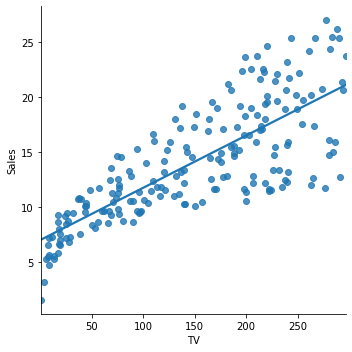

In [10]:
## let's use seaborn to plot a regression line
sns.lmplot(x = 'TV', y = 'Sales', data = advertising, ci = 0)
plt.draw()


Goal: Minimize the errors! 

- What errors?

- How?

__Toy case__

<img src= "images/toy_errors.png" width = 450/>

Note that 


$$ e_i = y_{i} - (\beta_{0} + \beta_{1}x_{i})$$

__Errors__

<img src= "images/errors.png" width = 550>

__What is the total sum of errors?__





$$ e_{1} + e_{2} + \cdots + e_{N}$$

- Can you see the problem with this?

__Better Way to Measure Errors__


__Residual Sum of Squares__

$$ RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{N}^{2} $$

__Still room for improvement__ (Mean Squared Error)

$$ MSE = \frac{1}{N}\left(e_{1}^{2} + e_{2}^{2} + \cdots + e_{N}^{2} \right) $$ 

__Or in short__


$$ MSE = \frac{1}{N}\left( \sum_{i =1}^{N} e_{i}^{2} \right) $$ 




__Note that `MSE` is a function of $\beta_0, \beta_{1}$:__

$$ \mbox{MSE} = \frac{1}{N} (y_1 -\beta_{0} -\beta_{1}x_{1} )^{2} + (y_2 -\beta_{0} -\beta_{1}x_{2} )^{2} + \cdots + (y_N -\beta_{0} -\beta_{1}x_{N} )^{2}$$

__Hypothesis Function__
(Fix $\beta_0, \beta_{1}$ function of $x$)

$$ y = f(x) = \beta_{0} + \beta_{1} x $$



__Cost Function__
(This is a function of $\beta_0, \beta_{1}$)

$$ \mbox{MSE} = \frac{1}{N} (y_1 -\beta_{0} -\beta_{1}x_{1} )^{2} + (y_2 -\beta_{0} -\beta_{1}x_{2} )^{2} + \cdots + (y_N -\beta_{0} -\beta_{1}x_{N} )^{2}$$

__How :)__ (Least Squares Approach)

<img src= "images/best_fit.png" width = 350>

<img src= "images/cost_graph.png" width =550 />

[Image Source: Andrew Ng](https://www.youtube.com/watch?v=0kns1gXLYg4&ab_channel=ArtificialIntelligence-AllinOne)

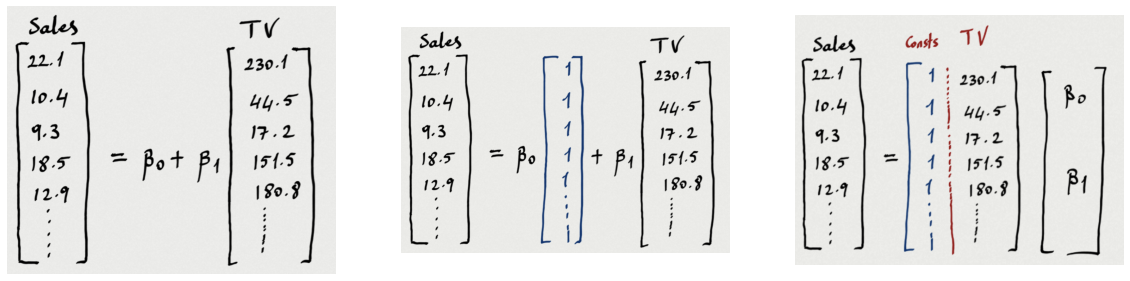

In [11]:
import matplotlib.image as mpimg 

f, axes = plt.subplots(nrows= 1, ncols = 3)
for i in range(3):
    axes[i].axis('off')
    if i==0:
        img = mpimg.imread(f'images/simple{i}.jpg')
    else:
        img = mpimg.imread(f'images/simple{i}.png')
    axes[i].imshow(img)
plt.gcf().set_size_inches(20, 20) 

Mathematically we will write:


$$\boldsymbol{y}  = X\cdot \boldsymbol{\beta} $$

__Seriously How!__

 - Direct Solution!
$$ \boldsymbol{\beta} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$


In [36]:

def least_squares(X,y):
    x_bar = X.mean()
    y_bar = y.mean()
    b1_num = (X - x_bar).dot(y - y_bar)
    b1_denom = ((X - x_bar)**2).sum()
    b1 = b1_num /b1_denom
    b0 = y_bar - b1*x_bar
    MSE = (((y - (b0 + b1*X))**2)).sum()
    return  b0,b1, (MSE**0.5)*1/200

least_squares(X_train.TV, X_train.Sales)

(6.946387530916522, 0.04774217741156741, 0.20446309192793596)

In [13]:
## we could use numpy to solve this directly

import numpy as np
X = np.array(X_train.TV)

ones = np.ones(shape = X.shape)

X = np.c_[ones, X]
X_Trans = X.T

np.linalg.inv( X_Trans.dot(X)).dot(X_Trans).dot(X_train.Sales)

array([7.24935754, 0.0480755 ])

__Or Gradient Descent and its Variations__

<img src = "images/Gradient_descent.png" width = 550 />

__Or Using Sklearn__


In [37]:
## Four Step workflow with sklearn
## 1. import the tool
from sklearn.linear_model import LinearRegression

## 2. instantiate the tool you would like to use.
lr = LinearRegression()

## 3. fit the model -- In this step machine 'learns': 
lr.fit(X_train[["TV"]], X_train.Sales)

## 4. check-out the results or make predictions
print(lr.intercept_, lr.coef_)

6.946387530916525 [0.04774218]


## Part-II: More than One Variables



- When we have more than one variable our linear model will look like as:

$$ Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon$$

__Notation:__

- $X_{1}, \cdots, X_{p}$ :  Columns of the dataset (or features or predictors or independent variables)

- $Y$ : target column in the dataset (or target variable or dependent variable)

- $\epsilon$ : Irreducible error.

__Goal:__ Given a dataset $X$ we would like to find coefficients $\beta_{1}, \cdots, \beta_{p}$ such that the sum of squared errors are minimum (Least Squares Approach!)

- Cost function (objective function) become:

\begin{align}
RSS &= \sum\limits_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} \\
&= \sum\limits_{i=1}^{n} (y_{i} - \beta_{0} - \beta_{1} x_{i1}  - \beta_{2}x_{i2} - \cdots  - \beta_{p}x_{ip})^{2}
\end{align}

In [60]:
## This time we will use statsmodels api

import statsmodels.api as sm

X = X_train[['TV', 'Radio', 'Newspaper']]
y = X_train.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True) ## OLS: Ordinary Least Square
res = mod.fit()
print(res.summary())

## R-squared: In one variable r

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     447.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.06e-76
Time:                        18:52:51   Log-Likelihood:                -311.53
No. Observations:                 160   AIC:                             631.1
Df Residuals:                     156   BIC:                             643.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9906      0.344      8.705      0.0

In [61]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


__Is this a good model?__

In [20]:
Xtest = X_test[['TV', 'Radio', 'Newspaper']]
ytest = X_test.Sales
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

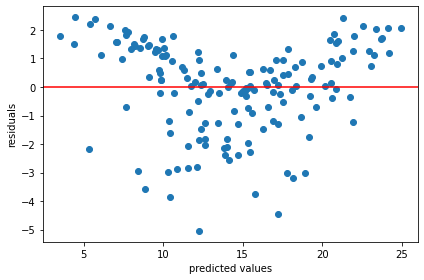

In [21]:
## To diagnose a linear model 
## it's always a good idea to check residual plots

residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

- For how to solve some of the potential problems in linear regression: check 3.3.3 of ISLR

## Review

## Further Reading 

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf

"Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 